<a href="https://colab.research.google.com/github/juhumkwon/DeepLearning/blob/main/CL_02_11_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

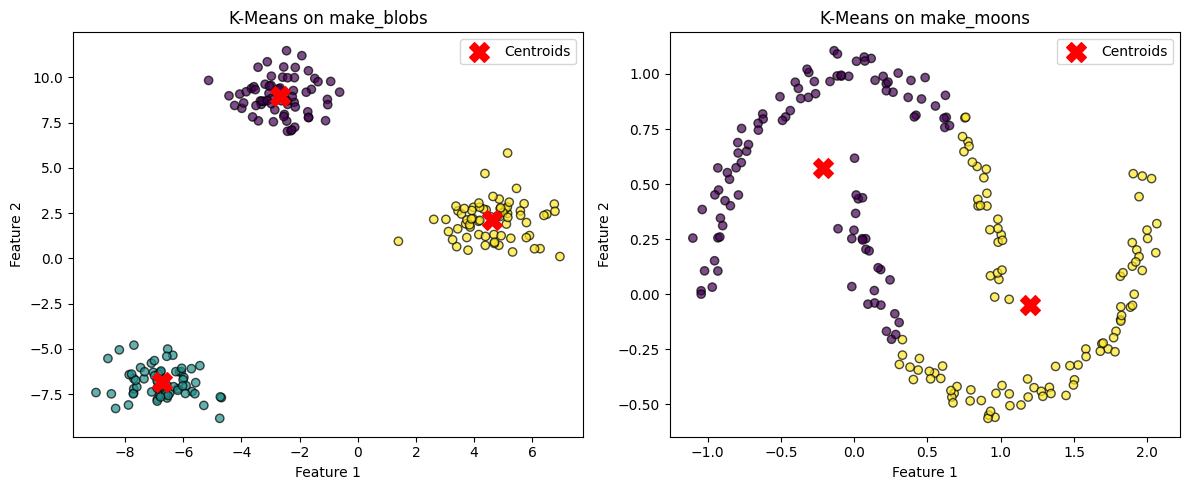

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_moons

# -----------------------------
# 1. 데이터 준비
# -----------------------------
X1, _ = make_blobs(n_samples=200, centers=3, cluster_std=1.0, random_state=42)
X2, _ = make_moons(n_samples=200, noise=0.05, random_state=42)

datasets = [("make_blobs", X1, 3), ("make_moons", X2, 2)] # 여기서 마지막 숫자 3과 2는 KMeans에 넣을 클러스터 개수(n_clusters)를 의미합니다.

# -----------------------------
# 2. K-Means 적용 & 시각화
# -----------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, (name, X, n_clusters) in enumerate(datasets):
    # KMeans 모델 학습
    """
    n_init=10 → K-Means를 10번 반복 수행,
    매번 중심값을 새로 무작위로 초기화,
    가장 inertia(WCSS)가 작은 결과를 최종 결과로 선택.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # n_init=10 → 10번 반복 후 최적 결과 선택
    kmeans.fit(X)

    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_

    # 그래프 그리기
    axes[i].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', alpha=0.7)
    axes[i].scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    axes[i].set_title(f"K-Means on {name}")
    axes[i].set_xlabel("Feature 1")
    axes[i].set_ylabel("Feature 2")
    axes[i].legend()

plt.tight_layout()
plt.show()
